In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
air_passengers = pd.read_csv('./AirPassengers.csv', index_col='Month', parse_dates=True)
air_passengers.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [3]:
air_passengers.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


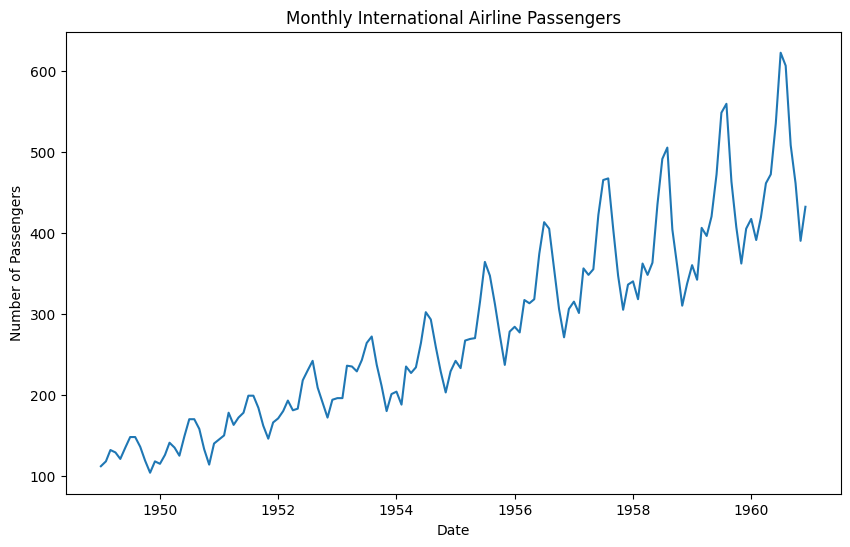

In [4]:
# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(air_passengers)
plt.title('Monthly International Airline Passengers')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.show()

### Linear Regression

In [5]:
# Create a time index feature
air_passengers['TimeIndex'] = np.arange(len(air_passengers))

# Split into features (X) and target (y)
X = air_passengers[['TimeIndex']]
y = air_passengers['Passengers']

# Initialize the linear regression model
model = LinearRegression()

# Fit the model to the data
model.fit(X, y)

# Predict the values
predictions = model.predict(X)

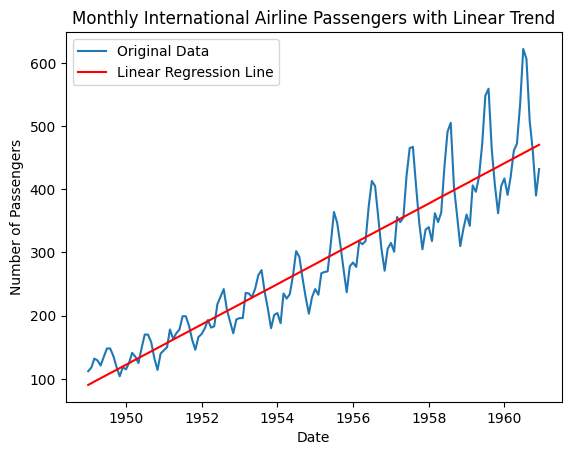

In [6]:
plt.plot(air_passengers.index, y, label='Original Data')

# Plot the linear regression line
plt.plot(air_passengers.index, predictions, color='red', label='Linear Regression Line')

plt.title('Monthly International Airline Passengers with Linear Trend')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()

In [7]:
# Calculate evaluation metrics
mae = mean_absolute_error(y, predictions)
mse = mean_squared_error(y, predictions)
r2 = r2_score(y, predictions)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R2): {r2}')

Mean Absolute Error (MAE): 34.405547573435506
Mean Squared Error (MSE): 2091.7994339346533
R-squared (R2): 0.853638165603188


### Detrending

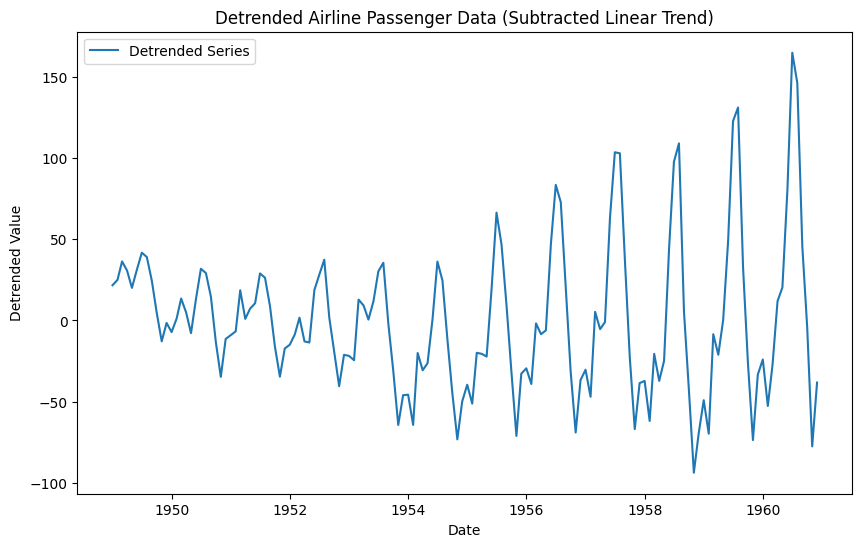

In [8]:
detrended = y - predictions

# Plot the detrended series
plt.figure(figsize=(10, 6))
plt.plot(air_passengers.index, detrended, label='Detrended Series')
plt.title('Detrended Airline Passenger Data (Subtracted Linear Trend)')
plt.xlabel('Date')
plt.ylabel('Detrended Value')
plt.legend()
plt.show()

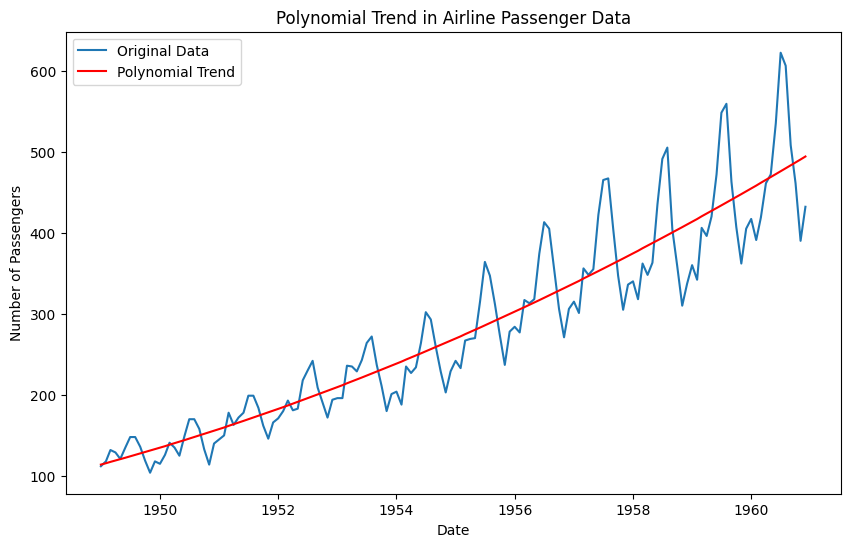

In [9]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

poly_model = LinearRegression()
poly_model.fit(X_poly, y)

poly_trend = poly_model.predict(X_poly)

plt.figure(figsize=(10, 6))
plt.plot(air_passengers.index, y, label='Original Data')
plt.plot(air_passengers.index, poly_trend, color='red', label='Polynomial Trend')
plt.title('Polynomial Trend in Airline Passenger Data')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()

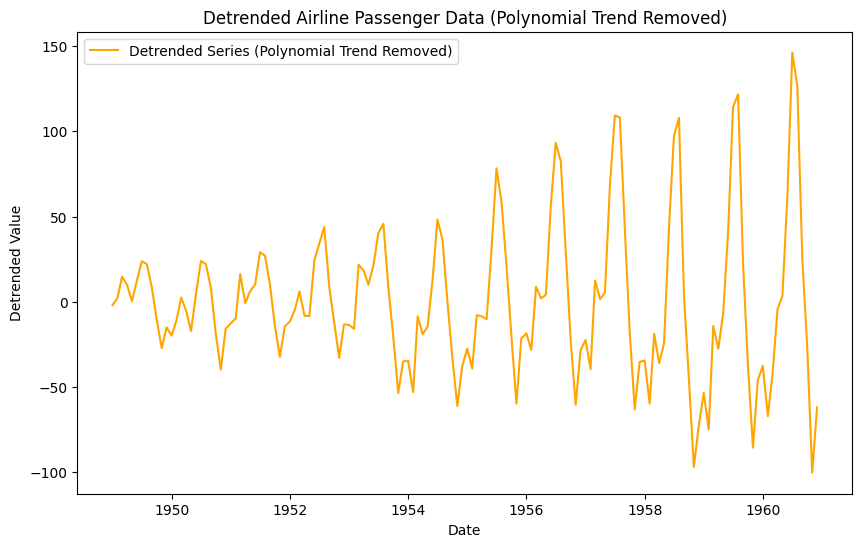

In [10]:
poly_detrended = y - poly_trend
plt.figure(figsize=(10, 6))
plt.plot(air_passengers.index, poly_detrended, label='Detrended Series (Polynomial Trend Removed)', color='orange')
plt.title('Detrended Airline Passenger Data (Polynomial Trend Removed)')
plt.xlabel('Date')
plt.ylabel('Detrended Value')
plt.legend()
plt.show()

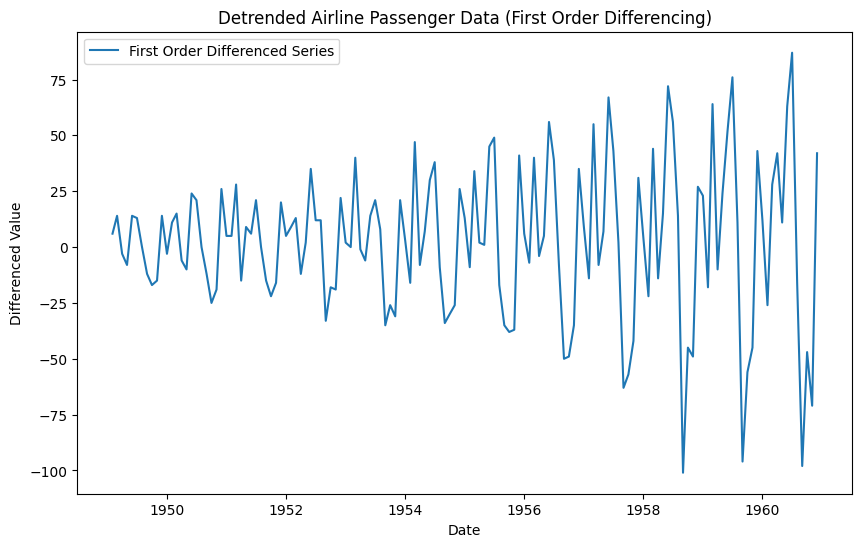

In [19]:
differenced = y.diff().dropna()

# Plot the differenced series
plt.figure(figsize=(10, 6))
plt.plot(differenced, label='First Order Differenced Series')
plt.title('Detrended Airline Passenger Data (First Order Differencing)')
plt.xlabel('Date')
plt.ylabel('Differenced Value')
plt.legend()
plt.show()

## Why does differencing work?
### Linear Trends

$$y_t = \alpha + \beta t + \epsilon_t$$
$$\Delta y = y_{t} - y_{t-1}$$
$$\Delta y = (\alpha + \beta t + \epsilon_t) - (\alpha + \beta(t-1) + \epsilon_{t-1})$$
$$\Delta y = \beta + \epsilon_t - \epsilon_{t-1}$$

### Exponential Trends
$$y_t = e^{\alpha + \beta t + \epsilon_t}$$
Taking the log
$$log(y_t) = \alpha + \beta t + \epsilon_t$$
Then we perform the same calculations as for linear ternds

### Polynomial Trends
$$y_t = \alpha_0 + \alpha_1t + \alpha_2t^2 \dots + \alpha_nt^n + \epsilon_t$$
First-order differencing
$$\Delta y = y_{t} - y_{t-1}$$
$$\Delta y = (\alpha_0 + \alpha_1t + \alpha_2t^2 \dots + \alpha_nt^n + \epsilon_t) - (\alpha_0 + \alpha_1(t-1) + \alpha_2(t-1)^2 \dots + \alpha_n(t-1)^n + \epsilon_{t-1})$$
$$\Delta y = (\alpha_1t - \alpha_1(t-1)) + (\alpha_2t^2 - \alpha_2(t-1)^2) \dots (\alpha_nt^n - \alpha_n(t-1)^n)$$

First order term: $\alpha$

Second order term: $\alpha_2t^2 - \alpha_2 (t^2 - 2t + 1) = 2\alpha_2t - \alpha_2$

So, differencing once reduces the trend by one degree. For a n-th degree polynomial trend, if we perform differencing n times, we should get back just a constant term.